In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [3]:
df = pd.DataFrame(pd.read_csv('../output/us_costs_of_living.csv')).drop(columns=['Unnamed: 0'])
df

,name,us_state,cost_of_living_index,cost_of_living_plus_rent_index,groceries_index,local_purchasing_power_index,rent_index,restaurant_price_index,last_updated_timestamp,cost_of_living_details
0,Akron,OH,61.51,43.19,62.82,95.09,21.92,51.34,2021-07-23 06:04:03.894450+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
1,Albany,NY,71.27,54.47,68.54,100.38,34.96,78.90,2021-07-23 06:03:12.784457+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
2,Albuquerque,NM,61.47,46.77,63.74,101.92,29.71,59.80,2021-07-23 06:04:03.870895+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
3,Anchorage,AK,91.62,66.90,97.01,100.29,38.21,77.74,2021-07-23 06:01:51.163839+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
4,Ann Arbor,MI,72.24,61.74,74.28,135.21,49.54,66.69,2021-07-23 06:03:04.324288+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
...,...,...,...,...,...,...,...,...,...,...
90,Tucson,AZ,64.63,47.81,60.96,70.92,28.28,66.30,2021-07-23 06:03:52.881112+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
91,Tulsa,OK,60.84,46.73,59.89,120.28,30.35,55.47,2021-07-23 06:04:04.509476+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
92,Vancouver,WA,67.80,57.29,63.58,102.83,45.08,68.41,2021-07-23 06:03:34.546316+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."
93,Washington,DC,83.74,81.01,83.81,97.43,77.83,79.50,2021-07-23 06:02:00.327068+00:00,"[{'currency': 'USD', 'details': [{'Item': 'Est..."


In [54]:
import re
p = re.compile('(?<!\\\\)\'')

beer_cities = []

for index, row in df.iterrows():
    city_beer = {row['name']:[]}
    string = p.sub('\"', row['cost_of_living_details'])
    details = json.loads(string)[0]['details']
    for item in details:
        if 'Beer' in item['Item']:
            city_beer[row['name']].append(item)
    beer_cities.append(city_beer)
beer_cities

[{'Akron': [{'Item': 'Domestic Beer (1 pint draught)',
    'Range': '2.0-11.01',
    'Value': '3.0'},
   {'Item': 'Imported Beer (12 oz small bottle)',
    'Range': '3.0-11.01',
    'Value': '4.0'},
   {'Item': 'Domestic Beer (0.5 liter bottle)',
    'Range': '1.42-4.29',
    'Value': '1.97'},
   {'Item': 'Imported Beer (12 oz small bottle)',
    'Range': '1.5-5.0',
    'Value': '2.25'}]},
 {'Albany': [{'Item': 'Domestic Beer (1 pint draught)',
    'Range': '3.5-8.01',
    'Value': '4.0'},
   {'Item': 'Imported Beer (12 oz small bottle)',
    'Range': '6.01-8.01',
    'Value': '6.5'},
   {'Item': 'Domestic Beer (0.5 liter bottle)',
    'Range': '1.07-2.86',
    'Value': '2.26'},
   {'Item': 'Imported Beer (12 oz small bottle)',
    'Range': '1.1-3.0',
    'Value': '2.21'}]},
 {'Albuquerque': [{'Item': 'Domestic Beer (1 pint draught)',
    'Range': '3.0-7.01',
    'Value': '5.0'},
   {'Item': 'Imported Beer (12 oz small bottle)',
    'Range': '4.0-7.01',
    'Value': '4.76'},
   {'Item'

In [57]:
domestic = []
for index, row in df.iterrows():
    string = p.sub('\"', row['cost_of_living_details'])
    details = json.loads(string)[0]['details']
    for item in details:
        if 'Domestic Beer (0.5 liter bottle)' in item['Item']:
                city_beer = {'city':row['name'],'domestic_beer_bottle_value':float(item['Value'])}
    domestic.append(city_beer)

In [58]:
beer_df = pd.DataFrame(domestic)\
            .sort_values('domestic_beer_bottle_value', ascending=False)\
            .set_index('city')
beer_df

,domestic_beer_bottle_value
city,
Philadelphia,4.00
Chattanooga,3.85
Huntsville,3.82
Asheville,3.79
Bellevue,3.74
...,...
Orlando,1.84
El Paso,1.74
Spokane,1.67


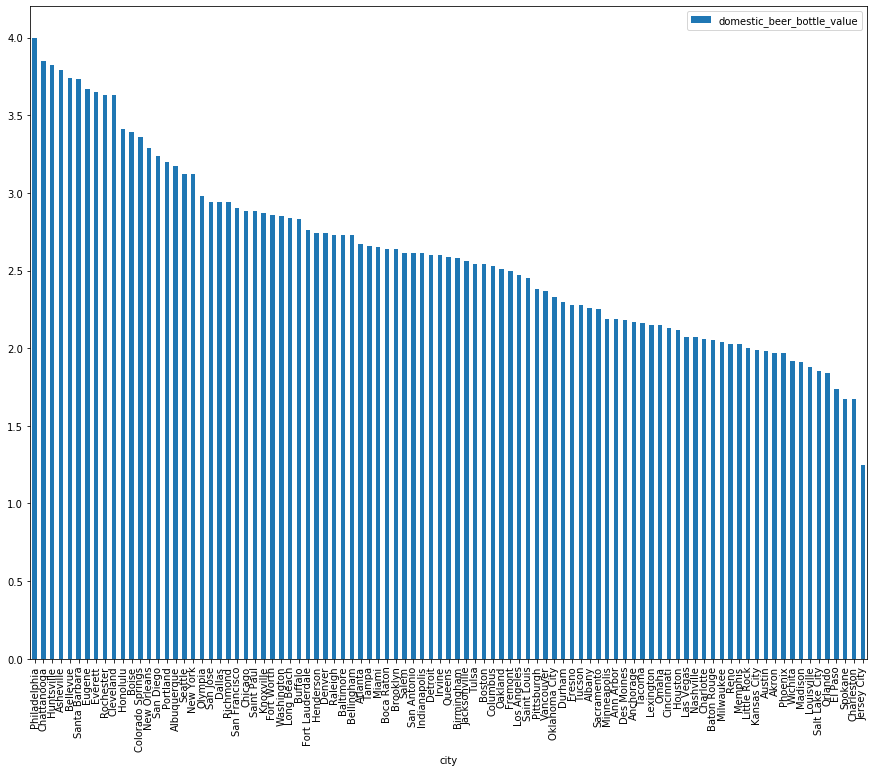

In [59]:
beer_df.plot.bar(figsize=(15,12))